### Setup

In [1]:
using Dragoon
using Pkg
Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
Pkg.update()

    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`


   Resolving package versions...


  No Changes to `C:\Users\domin\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\domin\.julia\environments\v1.9\Manifest.toml`


In [2]:
using Dragoon
# using Plots
# using Dates

In [3]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = findpeak(22.025e9,n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = AnalyticalBooster(initdist)
# booster.timestamp = DateTime(0)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,ObjAnalytical)
#                           ^ length, should be at least the larger of (n^2, search steps)
;

Objective Value: -243.3, Timestamp: 0000-01-01T00:00:00


### Optimizer

In [4]:
#=
how to use

linesearch(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          base step length e.g. motorspeed*measurementfrequency
    (objective,[options]),      objective function
    (solver,[options]),         provides step direction p
    (derivative,[options]),     provides derivatives for use by solver
    (step,[options]),           calculates steplength
    (search,[options]),         search mode
    (unstuckinator,[options]);  tries to unstuck system from bad local minima
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true          wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [5]:
trace = linesearch(booster,hist,freqs,-booster.vmotor*1e-3,
                    ObjAnalytical,
                    SolverNewton("inv"),
                    Derivator2(1e-5,1e-6,"double"),
                    StepNorm("unit"),
                    SearchExtendedSteps(2000),
                    UnstuckDont;
                    ϵgrad=0.,maxiter=Int(1e2),showtrace=true);

Gradient norm: 4.69e6


Iter: 1, timestamp: 22 seconds
Iter finished. Steps: 2000, Objective value: -594.229



Gradient norm: 1.06e7


Iter: 2, timestamp: 44 seconds
Iter finished. Steps: 2000, Objective value: -979.995



Gradient norm: 1.76e7


Iter: 3, timestamp: 1 minute, 6 seconds
Iter finished. Steps: 2000, Objective value: -1335.444



Gradient norm: 2.48e7


Iter: 4, timestamp: 1 minute, 28 seconds
Iter finished. Steps: 2000, Objective value: -1682.144



Gradient norm: 3.23e7


Iter: 5, timestamp: 1 minute, 50 seconds
Iter finished. Steps: 2000, Objective value: -2024.194



Gradient norm: 3.95e7


Iter: 6, timestamp: 2 minutes, 12 seconds
Iter finished. Steps: 2000, Objective value: -2394.792



Gradient norm: 4.3e7


Iter: 7, timestamp: 2 minutes, 34 seconds
Iter finished. Steps: 2000, Objective value: -3246.05



Gradient norm: 5.34e7


Iter: 8, timestamp: 2 minutes, 56 seconds
Iter finished. Steps: 2000, Objective value: -4103.047



Gradient norm: 8.4e7


Iter: 9, timestamp: 3 minutes, 18 seconds
Iter finished. Steps: 2000, Objective value: -5236.845



Gradient norm: 7.71e7


Iter: 10, timestamp: 3 minutes, 41 seconds
Iter finished. Steps: 2000, Objective value: -5380.006



Gradient norm: 1.09e8


Iter: 11, timestamp: 4 minutes, 3 seconds
Iter finished. Steps: 950, Objective value: -5598.829



Gradient norm: 8.63e7


Iter: 12, timestamp: 4 minutes, 25 seconds
Iter finished. Steps: 1287, Objective value: -9890.989



Gradient norm: 1.13e8


Iter: 13, timestamp: 4 minutes, 48 seconds
Iter finished. Steps: 551, Objective value: -12198.361



Gradient norm: 5.18e7


Iter: 14, timestamp: 5 minutes, 12 seconds
Iter finished. Steps: 0, Objective value: -12198.361

Stuck. Trying to unstuck.

No unstucking tried. Terminating.
Terminated. 14 Iterations.
Final objective value: -12198.361
Elapsed movement time:  5 minutes, 12 seconds
Summed movement time:   9 minutes, 13 seconds
Elapsed computing time: 4 seconds, 440 milliseconds


In [6]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

20-element Vector{Float64}:
 0.007244295076395453
 0.015441402704592726
 0.023615786226782863
 0.031850340813378605
 0.04005916693033037
 0.0482676369495816
 0.05648421398499575
 0.06464302496578211
 0.07288743331792248
 0.08117478681065335
 0.08935487085501906
 0.0975253230739688
 0.10577015421001461
 0.11385775155236488
 0.12284126460155134
 0.13075836770940363
 0.13892096090349118
 0.1470809483892883
 0.1552048875869972
 0.16313459406041086

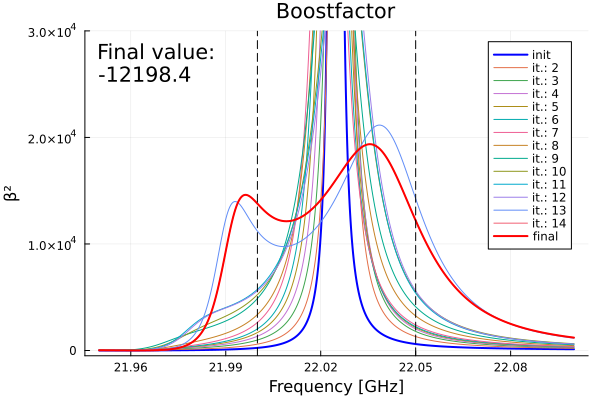

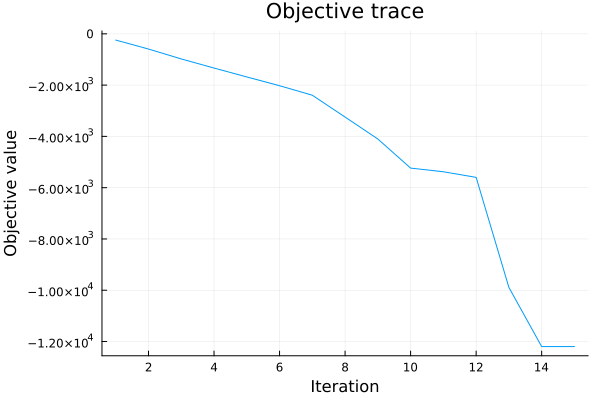

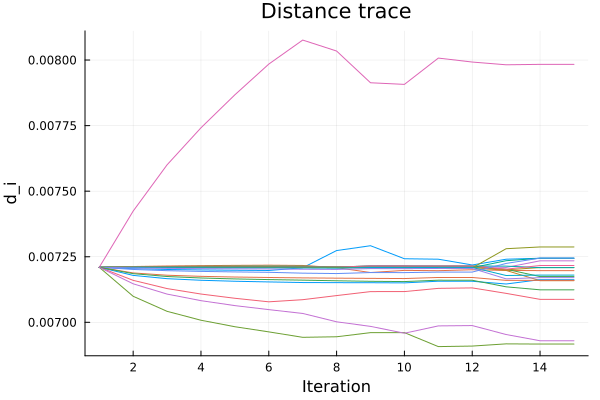

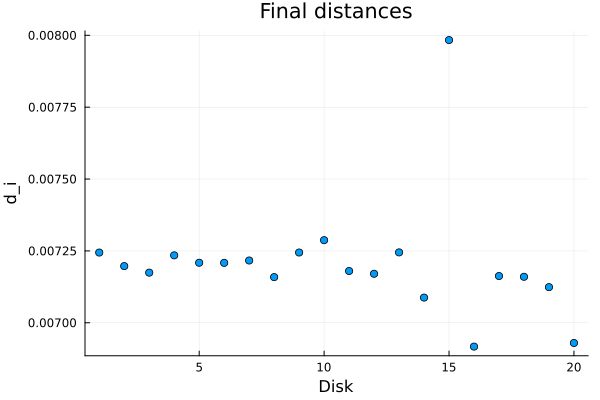

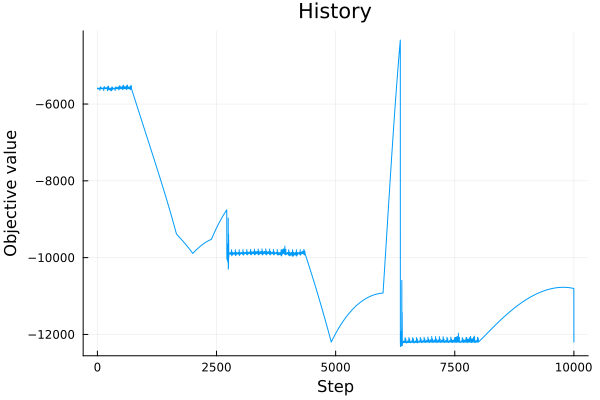

(Plot{Plots.GRBackend() n=16}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [7]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")